You are given a 2D integer grid of size m x n and an integer x. In one operation, you can add x to or subtract x from any element in the grid.

A uni-value grid is a grid where all the elements of it are equal.

Return the minimum number of operations to make the grid uni-value. If it is not possible, return -1.

 

Example 1:

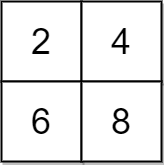

Input: grid = [[2,4],[6,8]], x = 2
Output: 4
Explanation: We can make every element equal to 4 by doing the following: 
- Add x to 2 once.
- Subtract x from 6 once.
- Subtract x from 8 twice.
A total of 4 operations were used.

Example 2:

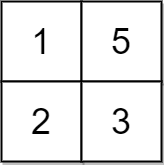

Input: grid = [[1,5],[2,3]], x = 1
Output: 5
Explanation: We can make every element equal to 3.

Example 3:

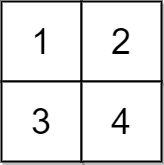

Input: grid = [[1,2],[3,4]], x = 2
Output: -1
Explanation: It is impossible to make every element equal.

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 105
    1 <= m * n <= 105
    1 <= x, grid[i][j] <= 104



In [ ]:
class Solution:
    def minOperations(self, grid: List[List[int]], x: int) -> int:
        arr = []
        for row in grid:
            arr.extend(row)
        arr.sort()
        final_number = arr[len(arr) // 2]
        while ((final_number - arr[0]) % x):
            final_number += 1
        ans = 0
        for num in arr:
            if (final_number - num) % x:
                return -1
            ans += abs(final_number - num) // x
        return ans

In [ ]:
class Solution:
    def minOperations(self, grid, x):
        # Create a list to store all the numbers from the grid
        nums_array = []
        result = 0

        # Flatten the grid into nums_array
        for row in grid:
            for num in row:
                nums_array.append(num)

        # Sort nums_array in non-decreasing order to easily find the median
        nums_array.sort()

        length = len(nums_array)
        # Store the median element as the final common value
        final_common_number = nums_array[length // 2]

        # Iterate through each number in nums_array
        for number in nums_array:
            # If the remainder when divided by x is different, return -1
            if number % x != final_common_number % x:
                return -1
            # Add the number of operations required to make the current number equal to final_common_number
            result += abs(final_common_number - number) // x

        return result

In [ ]:
class Solution:
    def minOperations(self, grid, x):
        # Initialize an empty array to store all numbers
        nums_array = []
        result = float("inf")

        # Flatten the grid into nums_array and check if all elements have the same remainder when divided by x
        for row in range(len(grid)):
            for col in range(len(grid[0])):
                # If remainder of any element doesn't match the first element, return -1
                if grid[row][col] % x != grid[0][0] % x:
                    return -1
                nums_array.append(grid[row][col])

        # Sort nums_array in non-decreasing order to easily calculate operations
        nums_array.sort()

        length = len(nums_array)
        prefix_sum = [0] * length
        suffix_sum = [0] * length

        # Calculate the prefix sum up to each index (excluding the current element)
        for index in range(1, length):
            prefix_sum[index] = prefix_sum[index - 1] + nums_array[index - 1]

        # Calculate the suffix sum from each index (excluding the current element)
        for index in range(length - 2, -1, -1):
            suffix_sum[index] = suffix_sum[index + 1] + nums_array[index + 1]

        # Iterate through nums_array to calculate the number of operations for each potential common value
        for index in range(length):
            left_operations = (
                nums_array[index] * index - prefix_sum[index]
            ) // x
            right_operations = (
                suffix_sum[index] - nums_array[index] * (length - index - 1)
            ) // x
            # Update the result with the minimum operations needed
            result = min(result, left_operations + right_operations)

        return result

In [ ]:
class Solution:
    def minOperations(self, grid: list[list[int]], x: int) -> int:
        nums_array = []
        result = 0

        # Flatten the grid into nums_array and check remainder condition
        for row in range(len(grid)):
            for col in range(len(grid[0])):
                # If any element has a different remainder than the first element,
                # it is impossible to make all elements equal, so
                # return -1
                if grid[row][col] % x != grid[0][0] % x:
                    return -1
                nums_array.append(grid[row][col])

        nums_array.sort()

        length = len(nums_array)
        prefix_index = 0
        suffix_index = length - 1

        # Move prefix_index and suffix_index towards the middle
        while prefix_index < suffix_index:
            # If the prefix of equal elements is shorter than the suffix
            if prefix_index < length - suffix_index - 1:
                # Calculate the number of operations required to extend the prefix
                prefix_operations = (
                    (prefix_index + 1)
                    * (nums_array[prefix_index + 1] - nums_array[prefix_index])
                    // x
                )
                result += prefix_operations
                # Move the prefix index forward
                prefix_index += 1
            else:
                # Calculate the number of operations required to extend the suffix
                suffix_operations = (
                    (length - suffix_index)
                    * (nums_array[suffix_index] - nums_array[suffix_index - 1])
                    // x
                )
                result += suffix_operations
                # Move the suffix index backward
                suffix_index -= 1

        return result